# 📘 Assessment: Timing Programs, Counting Operations, and Complexity Analysis
MIT 6.100L (Inspired) – Introduction to Computer Science and Programming Using Python  
Eldo-Hub – Data Science Students  

---
## 🎯 Learning Goals
- Reinforce concepts from **Lecture 21** (Timing Programs, Counting Operations)
- Apply theory from **Lecture 22** (Big-O, Big-Theta, Order of Growth)
- Practice analyzing and comparing algorithm performance
- Build intuition for how runtime and complexity grow with input size

---
## 📂 Instructions
- Complete each question below inside this notebook.
- Use **code cells** for programming tasks.
- Use **markdown cells** for explanations.
- Submit your completed notebook as your assessment.

---

## Part 1: Timing Programs (Lecture 21)

### Q1. Timing Functions
Write two functions:
1. A function that computes the sum of integers from 1 to n using a **loop**.
2. A function that computes the sum of integers from 1 to n using the **formula** (n(n+1)/2).

Use Python's `time` module to measure execution time for increasing values of n (`[10**3, 10**5, 10**7]`).

**Task:** Compare the timing results and explain why they differ.

In [1]:
import time

# Function 1: Sum using a loop
def sum_loop(n):
    total = 0
    for i in range(1, n + 1):
        total += i
    return total

# Function 2: Sum using formula
def sum_formula(n):
    return n * (n + 1) // 2

# Test values
test_values = [10**3, 10**5, 10**7]

# Run timing experiments
for n in test_values:
    # Time loop method
    start = time.time()
    sum_loop(n)
    loop_time = time.time() - start

    # Time formula method
    start = time.time()
    sum_formula(n)
    formula_time = time.time() - start

    print(f"n = {n}")
    print(f" Loop time:    {loop_time:.6f} seconds")
    print(f" Formula time: {formula_time:.6f} seconds")
    print("-" * 40)


n = 1000
 Loop time:    0.000049 seconds
 Formula time: 0.000001 seconds
----------------------------------------
n = 100000
 Loop time:    0.005623 seconds
 Formula time: 0.000002 seconds
----------------------------------------
n = 10000000
 Loop time:    0.786759 seconds
 Formula time: 0.000005 seconds
----------------------------------------


Task: Compare the timing results and explain why they differ
 1. loop method grows linearly with
 O(n)  and becomes very slow as n increases.
 2. For formula method time is constant O(1) and execution time barely changes as n grows.
  * for n = 10**7 the loop function took  0.786759 seconds while the formula function
   took only a few seconds.










### Q2. Counting Operations
Modify your loop-based sum function to count how many operations it performs for input size `n`.

**Task:** Express its growth in terms of Big-O notation.

In [4]:
def sum_loop_count(n):
    total = 0            # 1 operation (constant)
    operations = 0       # 1 operation (constant)
    for i in range(1, n+1):   # runs n times
        total += i       # 1 operation per loop
        operations += 1  # 1 operation per loop
    return total, operations
print(sum_loop_count(10))
print(sum_loop_count(1000))

(55, 10)
(500500, 1000)


Task: Express its growth in terms of Big-O notation.
For input size n, the function performs n operations, showing its O(n) complexity.



## Part 2: Complexity Analysis (Lecture 22)

### Q3. Linear vs Quadratic Growth
Consider the following two functions:
```python
def linear_sum(L):
    total = 0
    for x in L:
        total += x
    return total

def quadratic_pairs(L):
    count = 0
    for i in L:
        for j in L:
            count += i*j
    return count
```

**Task:**
1. Count the number of operations for both functions.
2. Determine their order of growth (Big-O and Big-Theta).
3. Plot their runtime growth for increasing input sizes.

In [ ]:
def linear_sum(L):
    total = 0                # 1 operation
    for x in L:              # loop runs n times
        total += x           # 1 operation per iteration
    return total


the loop runs n times when n= len(L).
each iteration does a constant number of operations.

total operations = n + 2

growth = O(n).

In [ ]:
def quadratic_pairs(L):
    count = 0
    for i in L:             # outer loop → n iterations
        for j in L:         # inner loop → n iterations for each i
            count += i*j    # 1 operation per iteration
    return count


The outer loop runs n times while the inner loop runs n times for each outer loop --> n * n = n^2 iterations
Each iteration does a constant number of operations.
 Total operations = n^2 + 2

 Growth = O(n^2).


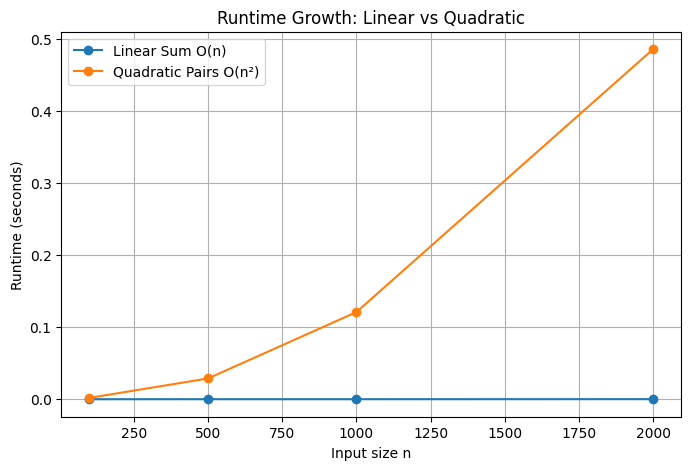

In [7]:
import time
import matplotlib.pyplot as plt

# Functions
def linear_sum(L):
    total = 0
    for x in L:
        total += x
    return total

def quadratic_pairs(L):
    count = 0
    for i in L:
        for j in L:
            count += i * j
    return count

# Input sizes
sizes = [100, 500, 1000, 2000]
linear_times = []
quadratic_times = []

for n in sizes:
    L = list(range(n))

    # Time linear_sum
    start = time.time()
    linear_sum(L)
    linear_times.append(time.time() - start)

    # Time quadratic_pairs
    start = time.time()
    quadratic_pairs(L)
    quadratic_times.append(time.time() - start)

# Plot
plt.figure(figsize=(8,5))
plt.plot(sizes, linear_times, marker='o', label="Linear Sum O(n)")
plt.plot(sizes, quadratic_times, marker='o', label="Quadratic Pairs O(n²)")
plt.xlabel("Input size n")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime Growth: Linear vs Quadratic")
plt.legend()
plt.grid(True)
plt.show()


The linear function grows steadily with input size while quadratic function grows much faster.


### Q4. Searching Algorithms
1. Implement **linear search** and **binary search**.
2. Count the number of operations each requires for lists of size `[10**3, 10**4, 10**5, 10**6]`.
3. Compare against Python's built-in `in` operator.

**Task:** Plot how the number of operations grows with input size and explain the difference between Θ(n) and Θ(log n).

In [10]:
import time

# Linear Search
def linear_search(L, target):
    operations = 0
    for x in L:
        operations += 1
        if x == target:
            return True, operations
    return False, operations

# Binary Search (list must be sorted)
def binary_search(L, target):
    low, high = 0, len(L) - 1
    operations = 0
    while low <= high:
        operations += 1
        mid = (low + high) // 2
        if L[mid] == target:
            return True, operations
        elif L[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return False, operations

# Main test
sizes = [10**3, 10**4, 10**5, 10**6]

print(f"{'n':>10} | {'Linear Ops':>12} | {'Binary Ops':>12} | {'in Ops':>10} | {'in Time (sec)':>15}")
print("-" * 75)

for n in sizes:
    L = list(range(n))
    target = n - 1  # worst case: last element

    # Linear Search
    _, ops_linear = linear_search(L, target)

    # Binary Search
    _, ops_binary = binary_search(L, target)

    # Python built-in `in`
    start = time.time()
    found = target in L
    in_time = time.time() - start
    ops_in = n   # worst-case operations = length of list

    print(f"{n:>10} | {ops_linear:>12} | {ops_binary:>12} | {ops_in:>10} | {in_time:>15.6f}")


         n |   Linear Ops |   Binary Ops |     in Ops |   in Time (sec)
---------------------------------------------------------------------------
      1000 |         1000 |           10 |       1000 |        0.000017
     10000 |        10000 |           14 |      10000 |        0.000155
    100000 |       100000 |           17 |     100000 |        0.001196
   1000000 |      1000000 |           20 |    1000000 |        0.011627


Task: Plot how the number of operations grows with input size and explain the difference between Θ(n) and Θ(log n).


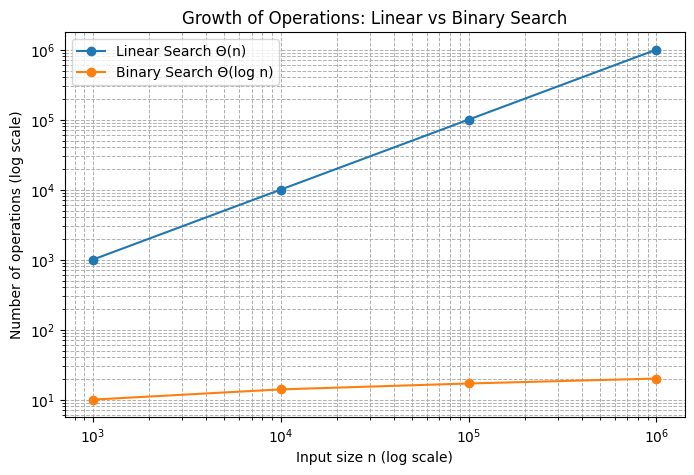

In [13]:
import matplotlib.pyplot as plt
import math

# Input sizes
sizes = [10**3, 10**4, 10**5, 10**6]

# Operation counts (worst case: target is last element)
linear_ops = [n for n in sizes]                         # Θ(n)
binary_ops = [math.ceil(math.log2(n)) for n in sizes]   # Θ(log n)

# Plot Linear vs Binary Search
plt.figure(figsize=(8,5))
plt.plot(sizes, linear_ops, marker='o', label="Linear Search Θ(n)")
plt.plot(sizes, binary_ops, marker='o', label="Binary Search Θ(log n)")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Input size n (log scale)")
plt.ylabel("Number of operations (log scale)")
plt.title("Growth of Operations: Linear vs Binary Search")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()


Explanation of Growth

Linear Search Θ(n) → operations grow directly with n.

Example: if n doubles, operations double.

Binary Search Θ(log n) → operations grow very slowly.

Example: if n doubles, operations only increase by 1.

For n = 1,000,000, it only takes ~20 steps.

## Part 3: Applied Analysis

### Q5. Matrix Multiplication
1. Write a function to multiply two n×n matrices.
2. Count the number of operations.
3. Express the complexity in Big-O and Big-Theta notation.

**Hint:** Nested loops matter!

In [15]:
def matrix_multiply(A, B):
    """
    Multiply two n x n matrices A and B.
    Count number of multiplications + additions.
    """
    n = len(A)
    C = [[0] * n for _ in range(n)]  # result matrix
    operations = 0

    for i in range(n):          # loop over rows of A
        for j in range(n):      # loop over columns of B
            for k in range(n):  # compute dot product
                C[i][j] += A[i][k] * B[k][j]
                operations += 2  # 1 multiplication + 1 addition

    return C, operations
A = [[1, 2],
     [3, 4]]

B = [[5, 6],
     [7, 8]]

C, ops = matrix_multiply(A, B)

print("Result:", C)
print("Operations:", ops)


Result: [[19, 22], [43, 50]]
Operations: 16


Operation Count

Innermost loop → runs n times. Second loop → runs n times for each i.Outer loop → runs n times.
so total iterations:
n×n×n=n3

complexity

Big-O (upper bound): O(n3) which means the algorithm won't take more than cubic time

Big-Theta (tight bound): Θ(n3) meaning algorithm will always perform on the order on n3 operations.

The standard matric multiplication runs in: O(n3)and Θ(n3)


### Q6. Best, Worst, and Average Case
Modify your **linear search** to count operations separately for:
- Best case (element is first)
- Worst case (element is last or missing)
- Average case (element is in the middle)

**Task:** Report the operation counts and classify their Big-O/Theta behavior.

In [16]:
def linear_search_cases(L, target_position="last"):
    """
    Count operations for Linear Search in best, average, and worst cases.

    Parameters:
        L (list): the list to search
        target_position (str): "first", "middle", "last", or "missing"
    """
    n = len(L)

    if target_position == "first":
        target = L[0]               # Best case
    elif target_position == "middle":
        target = L[n//2]            # Average case
    elif target_position == "last":
        target = L[-1]              # Worst case (last element)
    elif target_position == "missing":
        target = -1                 # Worst case (not found)
    else:
        raise ValueError("Choose: 'first', 'middle', 'last', or 'missing'")

    operations = 0
    for x in L:
        operations += 1
        if x == target:
            return True, operations
    return False, operations

L = list(range(1, 11))  # [1,2,...,10]

print("Best Case :", linear_search_cases(L, "first"))
print("Average Case :", linear_search_cases(L, "middle"))
print("Worst Case (last):", linear_search_cases(L, "last"))
print("Worst Case (missing):", linear_search_cases(L, "missing"))


Best Case : (True, 1)
Average Case : (True, 6)
Worst Case (last): (True, 10)
Worst Case (missing): (False, 10)


Operations counts

1. Best case: operatios = 1 and only one  comparision needed.

2. Average Case: operation = n/2 and on average, half the list must be scanned.

3. worst case: operations = n and must check every element.

Complexity

1. Best case: O(1) (upper bound is constant),   Θ(1) (tight bound, always 1 comparison in this scenario)

2. Average Case:
O(n) (upper bound grows ),   Θ(n) (tight bound ≈ n/2 comparisons)

3. Worst Case: O(n) (upper bound is linear),   Θ(n) (always requires scanning the entire list).



---
## ✅ Submission Checklist
- [ ] Completed all code implementations
- [ ] Counted operations where required
- [ ] Classified complexities in Big-O and Big-Theta
- [ ] Plotted growth where asked
- [ ] Explained observations clearly

Great work! 🚀 This assessment prepares you for **Lecture 24**.